In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
data = pd.read_excel('data.xlsx', na_values=['?', None])
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
data.shape

(150001, 55)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05
Avg Bearer TP UL (kbps),150000.0,1.770429e+03,4.625356e+03,0.000000e+00,4.700000e+01,6.300000e+01,1.120000e+03,5.861300e+04


In [7]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 51 numerical variables


In [10]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [11]:
# what is the % of missing values in the dataset?
def percent_missing(data):

    # Calculate total number of cells in dataframe
    totalCells = np.product(data.shape)

    # Count number of missing values per column
    missingCount = data.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The dataset contains 12.49 % missing values.


In [12]:
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [13]:
# drop columns with high number of missing values
data_dropped = data.drop(['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
data_dropped.shape

(150001, 47)

In [14]:
data_dropped.isna().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)       88146
TCP UL Retrans. Vol (Bytes)       96649
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1


In [15]:
numerical = []
categorical = []
timestamps = []

for col in data_dropped.columns:
    if data_dropped[col].dtype in ['float64']:
        numerical.append(col)
    elif data_dropped[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
data1 = data_dropped[features]
data1.head(3)

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Bearer Id,Last Location Name,Handset Manufacturer,Handset Type,Start,End
0,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,13114483460844900352,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,2019-04-04 12:01:18,2019-04-25 14:35:31
1,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,13114483482878900224,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),2019-04-09 13:04:04,2019-04-25 08:15:48
2,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,13114483484080500736,D42335A,Samsung,Samsung Galaxy A8 (2018),2019-04-09 17:42:11,2019-04-25 11:58:13


In [16]:
data1.dtypes

Start ms                                 float64
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 300 Kbps (%)           float64
UL TP > 300 Kbps (%)                     float64
Activity Duration DL

In [17]:
data1.shape

(150001, 47)

#Null Values in Numerical variables

In [18]:
#Null numerical values (percentage)
null = data1[numerical].isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_percentage = pd.DataFrame(null_per)
null_percentage

,0
TCP UL Retrans. Vol (Bytes),64.432237
TCP DL Retrans. Vol (Bytes),58.763608
Avg RTT DL (ms),18.552543
Avg RTT UL (ms),18.541210
MSISDN/Number,0.710662
Nb of sec with Vol UL < 1250B,0.528663
10 Kbps < UL TP < 50 Kbps (%),0.527996
50 Kbps < UL TP < 300 Kbps (%),0.527996
UL TP > 300 Kbps (%),0.527996
UL TP < 10 Kbps (%),0.527996


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(data1['Avg RTT DL (ms)'].values.reshape(-1, 1))
data1['TCP DL Retrans. Vol (Bytes)'] = imputer.transform(data1['TCP DL Retrans. Vol (Bytes)'].values.reshape(-1, 1))
data1['TCP UL Retrans. Vol (Bytes)'] = imputer.transform(data1['TCP UL Retrans. Vol (Bytes)'].values.reshape(-1, 1))

data1['Avg RTT DL (ms)'] = imputer.transform(data1['Avg RTT DL (ms)'].values.reshape(-1, 1))
data1['Total DL (Bytes)'] = imputer.transform(data1['Total DL (Bytes)'].values.reshape(-1, 1))
data1['Total UL (Bytes)'] = imputer.transform(data1['Total UL (Bytes)'].values.reshape(-1, 1))
data1['Avg RTT UL (ms)'] = imputer.transform(data1['Avg RTT UL (ms)'].values.reshape(-1, 1))
data1['DL TP < 50 Kbps (%)'] = imputer.transform(data1['DL TP < 50 Kbps (%)'].values.reshape(-1, 1))
data1['50 Kbps < DL TP < 250 Kbps (%)'] = imputer.transform(data1['50 Kbps < DL TP < 250 Kbps (%)'].values.reshape(-1, 1))
data1['250 Kbps < DL TP < 1 Mbps (%)'] = imputer.transform(data1['250 Kbps < DL TP < 1 Mbps (%)'].values.reshape(-1, 1))
data1['DL TP > 1 Mbps (%)'] = imputer.transform(data1['DL TP > 1 Mbps (%)'].values.reshape(-1, 1))
data1['UL TP < 10 Kbps (%)'] = imputer.transform(data1['UL TP < 10 Kbps (%)'].values.reshape(-1, 1))
data1['10 Kbps < UL TP < 50 Kbps (%)'] = imputer.transform(data1['10 Kbps < UL TP < 50 Kbps (%)'].values.reshape(-1, 1))
data1['50 Kbps < UL TP < 300 Kbps (%)'] = imputer.transform(data1['50 Kbps < UL TP < 300 Kbps (%)'].values.reshape(-1, 1))
data1['UL TP > 300 Kbps (%)'] = imputer.transform(data1['UL TP > 300 Kbps (%)'].values.reshape(-1, 1))
data1['Nb of sec with Vol DL < 6250B'] = imputer.transform(data1['Nb of sec with Vol DL < 6250B'].values.reshape(-1, 1))
data1['Nb of sec with Vol UL < 1250B'] = imputer.transform(data1['Nb of sec with Vol UL < 1250B'].values.reshape(-1, 1))

In [20]:
data1['Last Location Name'].fillna(data1['Last Location Name'].mode()[0], inplace=True)
data1['Handset Type'].fillna(data1['Handset Type'].mode()[0], inplace=True)
data1['Handset Manufacturer'].fillna(data1['Handset Manufacturer'].mode()[0], inplace=True)
data1['IMSI'].fillna(data1['IMSI'].mode()[0], inplace=True)
data1['IMEI'].fillna(data1['IMEI'].mode()[0], inplace=True)
data1['Start ms'].fillna(data1['Start ms'].mode()[0], inplace=True)
data1['End ms'].fillna(data1['End ms'].mode()[0], inplace=True)
data1['Dur. (ms)'].fillna(data1['Dur. (ms)'].mode()[0], inplace=True)
data1['Avg Bearer TP DL (kbps)'].fillna(data1['Avg Bearer TP DL (kbps)'].mode()[0], inplace=True)
data1['Avg Bearer TP UL (kbps)'].fillna(data1['Avg Bearer TP UL (kbps)'].mode()[0], inplace=True)
data1['Avg Bearer TP UL (kbps)'].fillna(data1['Avg Bearer TP UL (kbps)'].mode()[0], inplace=True)
data1['Avg Bearer TP UL (kbps)'].fillna(data1['Avg Bearer TP UL (kbps)'].mode()[0], inplace=True)
data1['Activity Duration DL (ms)'].fillna(data1['Activity Duration DL (ms)'].mode()[0], inplace=True)
data1['Activity Duration UL (ms)'].fillna(data1['Activity Duration UL (ms)'].mode()[0], inplace=True)
data1['Dur. (ms).1'].fillna(data1['Dur. (ms).1'].mode()[0], inplace=True)

In [21]:
data1['Start'] = pd.to_datetime(data['Start'])
data1['End'] = pd.to_datetime(data['End'])

In [22]:
data1.isna().sum()

Start ms                             0
End ms                               0
Dur. (ms)                            0
IMSI                                 0
MSISDN/Number                     1066
IMEI                                 0
Avg RTT DL (ms)                      0
Avg RTT UL (ms)                      0
Avg Bearer TP DL (kbps)              0
Avg Bearer TP UL (kbps)              0
TCP DL Retrans. Vol (Bytes)          0
TCP UL Retrans. Vol (Bytes)          0
DL TP < 50 Kbps (%)                  0
50 Kbps < DL TP < 250 Kbps (%)       0
250 Kbps < DL TP < 1 Mbps (%)        0
DL TP > 1 Mbps (%)                   0
UL TP < 10 Kbps (%)                  0
10 Kbps < UL TP < 50 Kbps (%)        0
50 Kbps < UL TP < 300 Kbps (%)       0
UL TP > 300 Kbps (%)                 0
Activity Duration DL (ms)            0
Activity Duration UL (ms)            0
Dur. (ms).1                          0
Nb of sec with Vol DL < 6250B        0
Nb of sec with Vol UL < 1250B        0
Social Media DL (Bytes)  

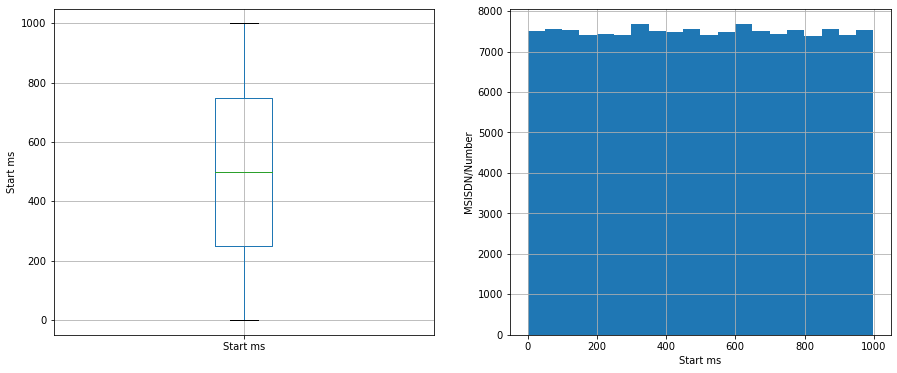

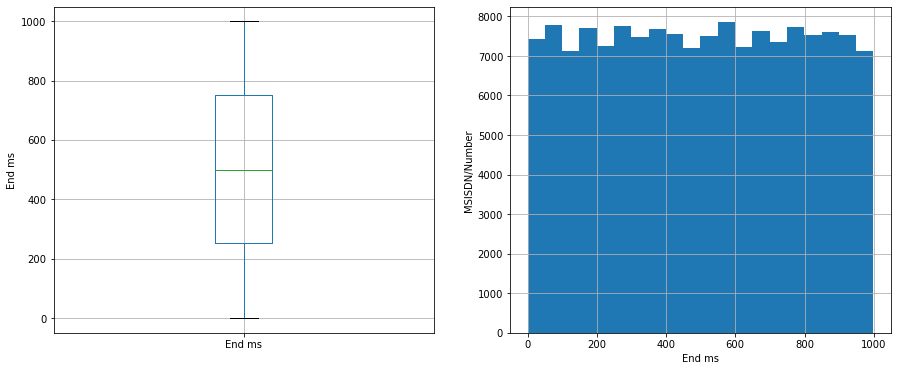

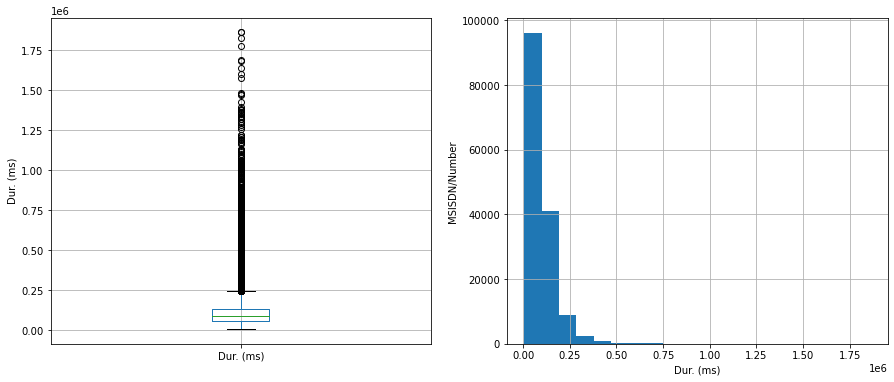

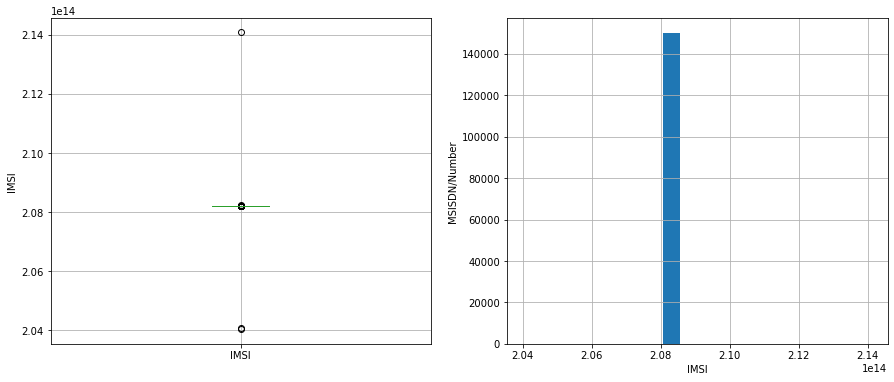

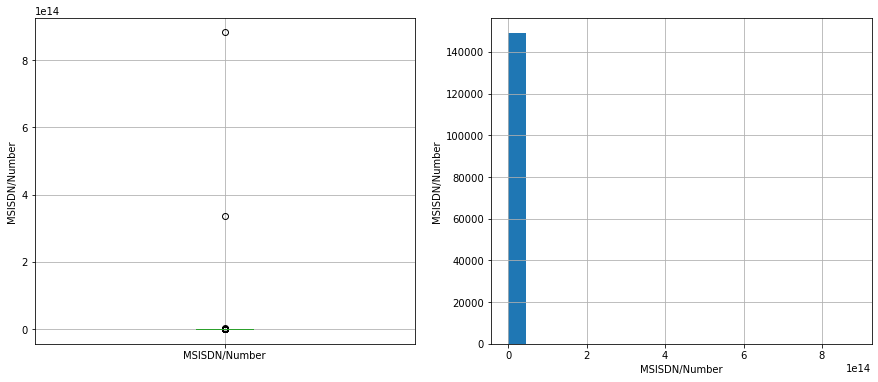

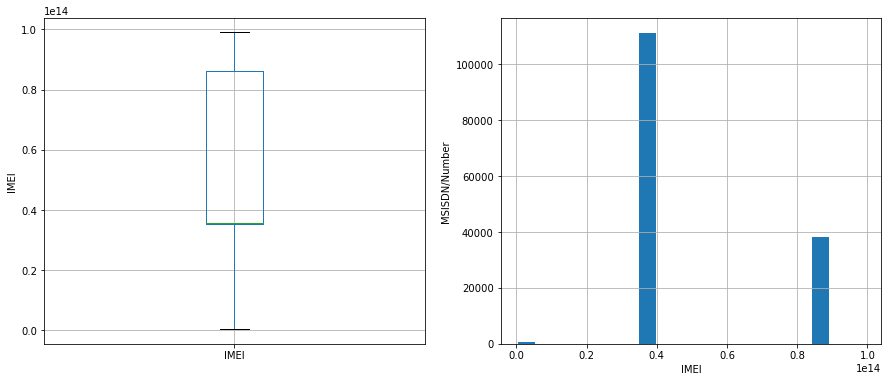

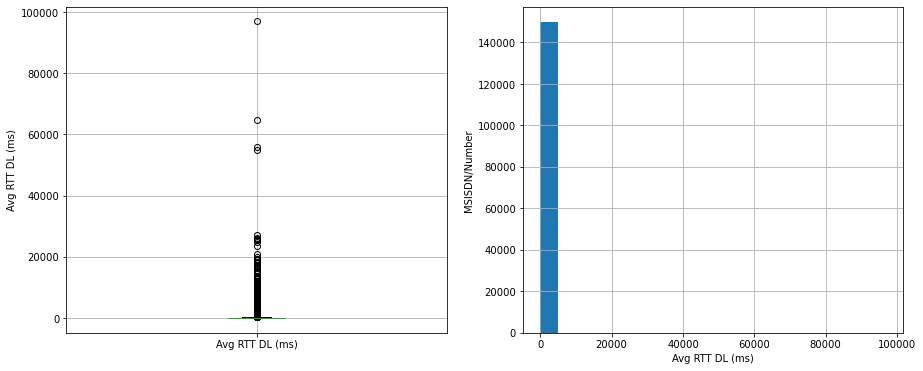

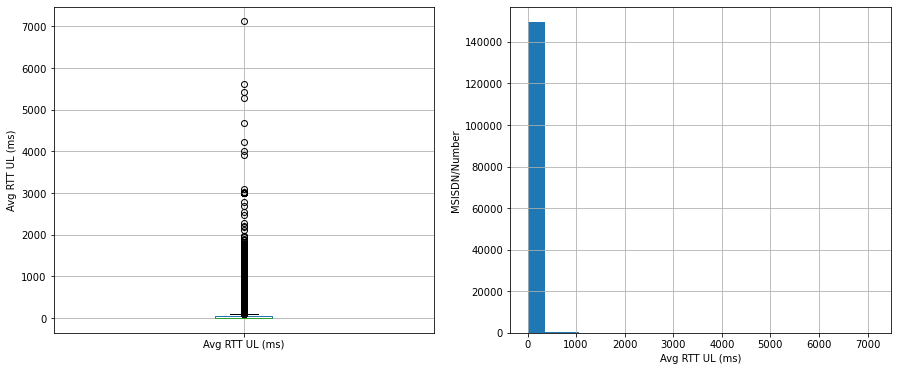

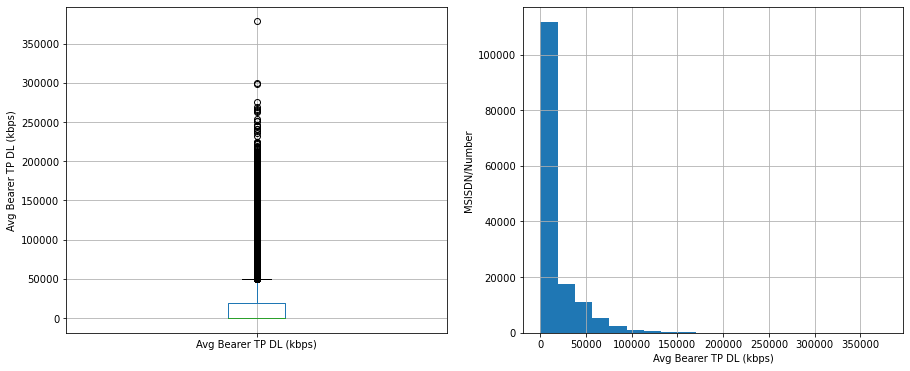

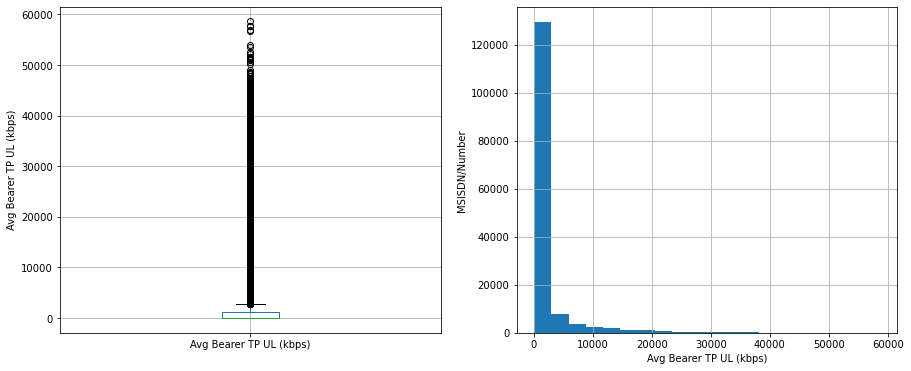

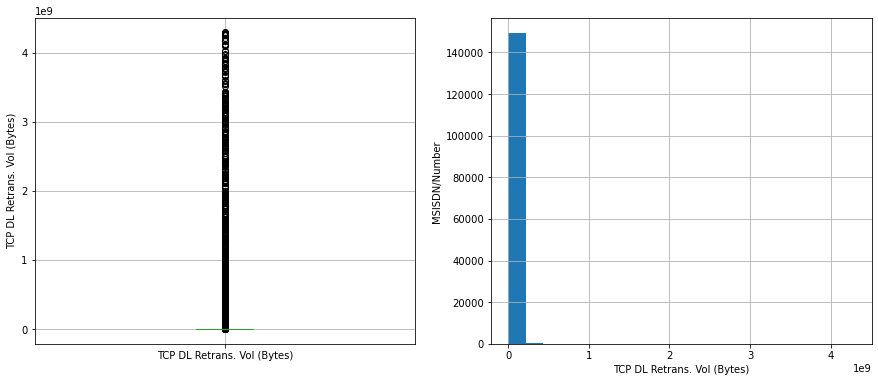

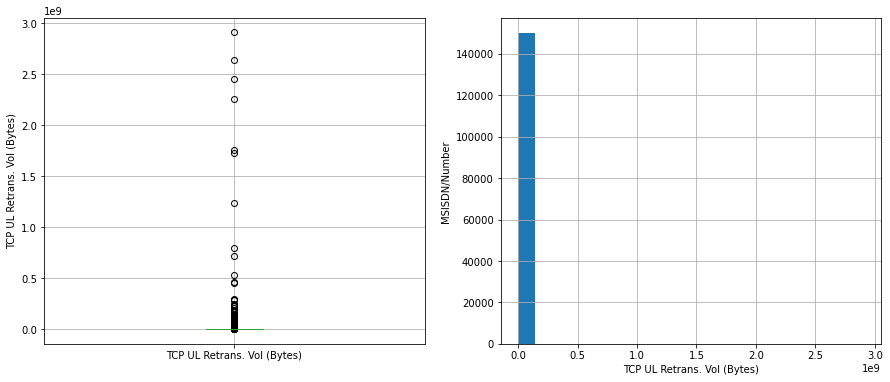

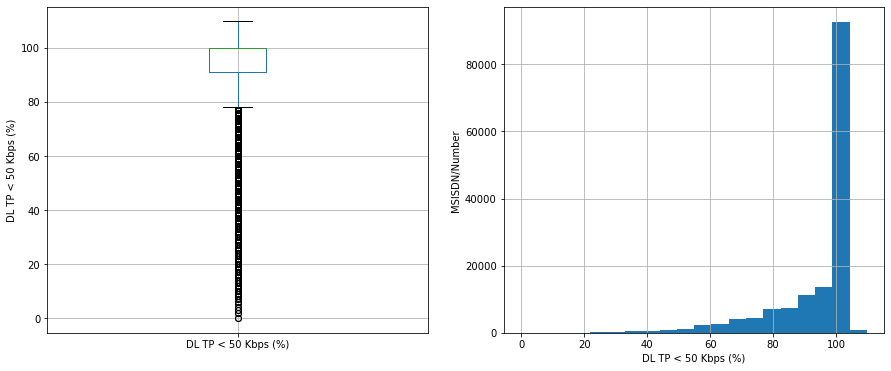

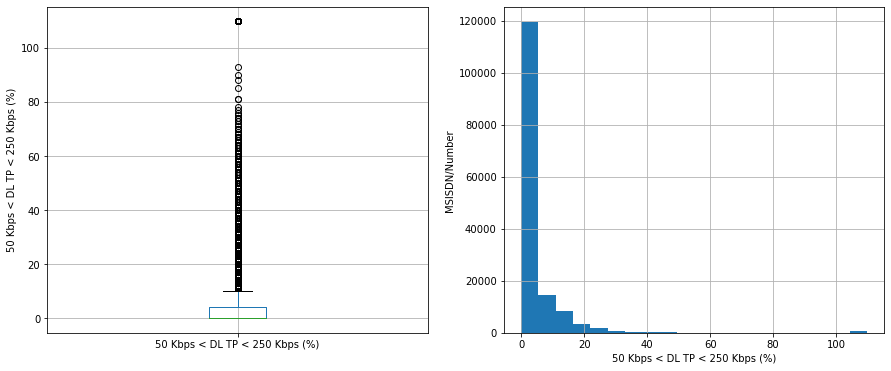

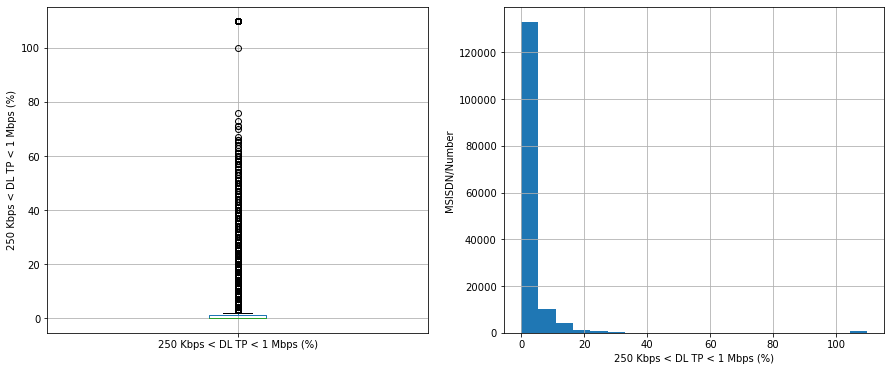

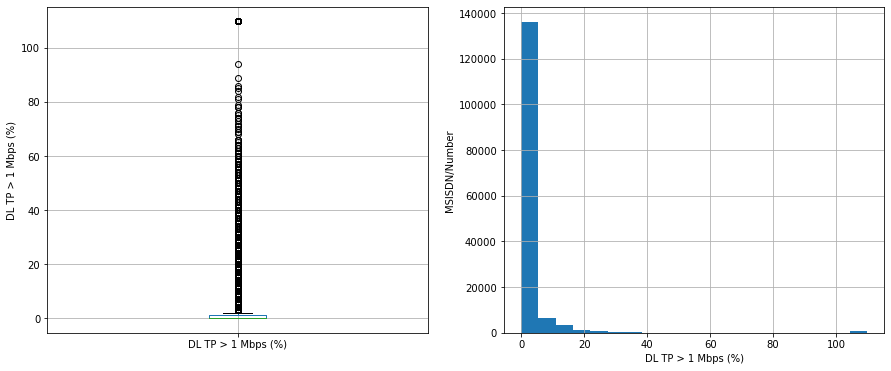

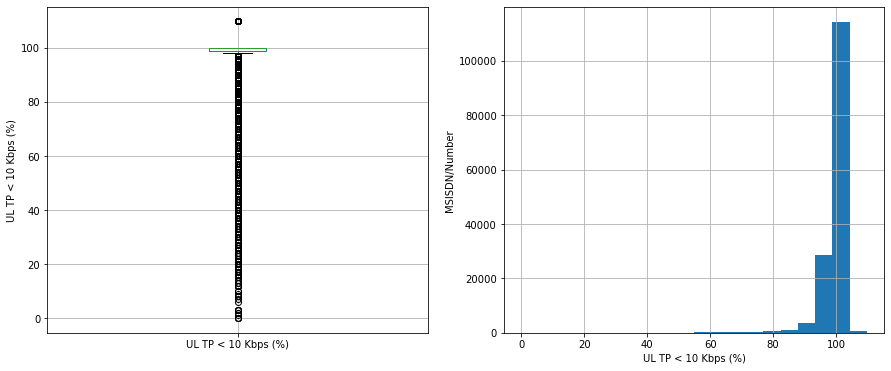

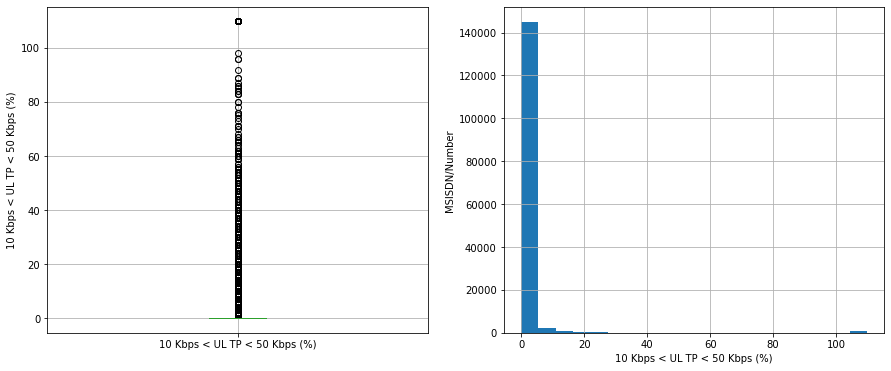

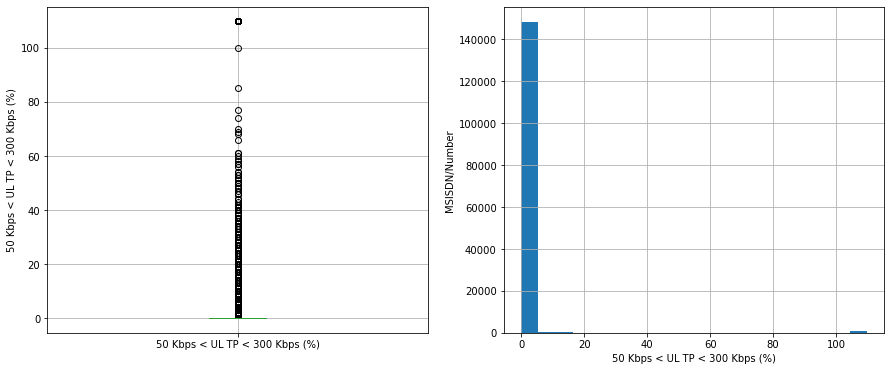

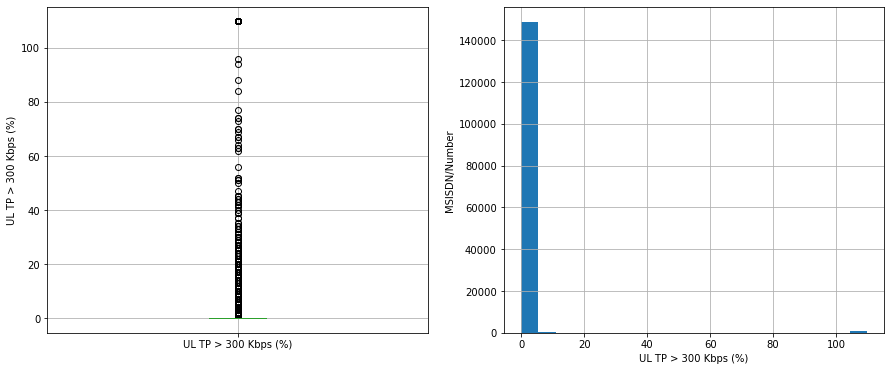

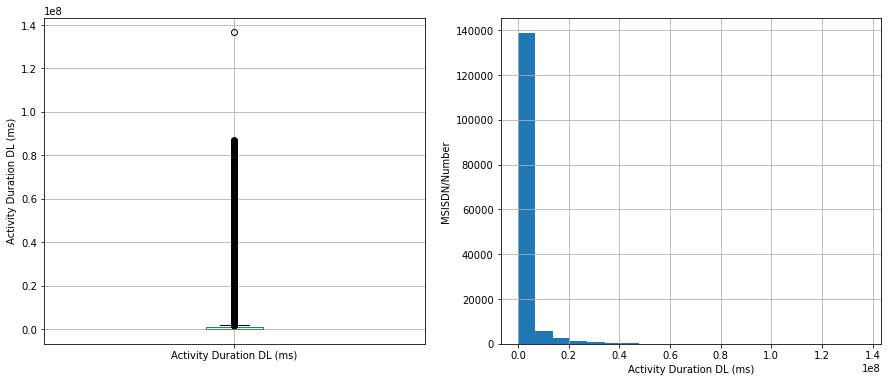

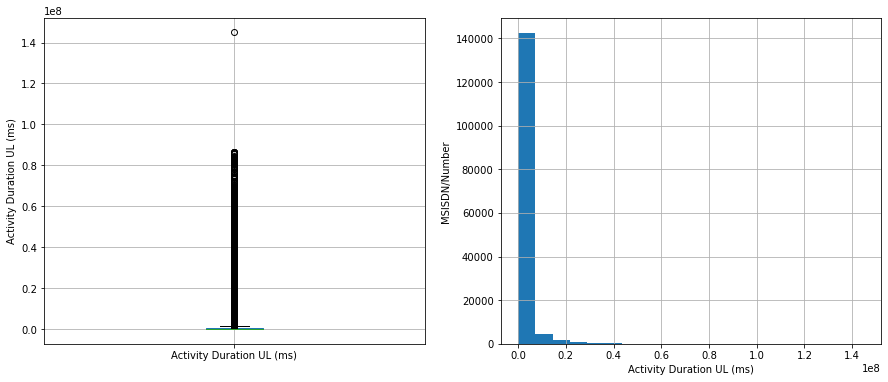

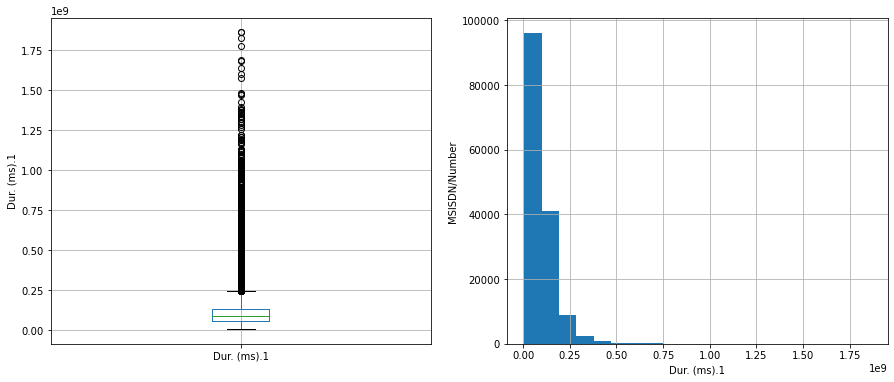

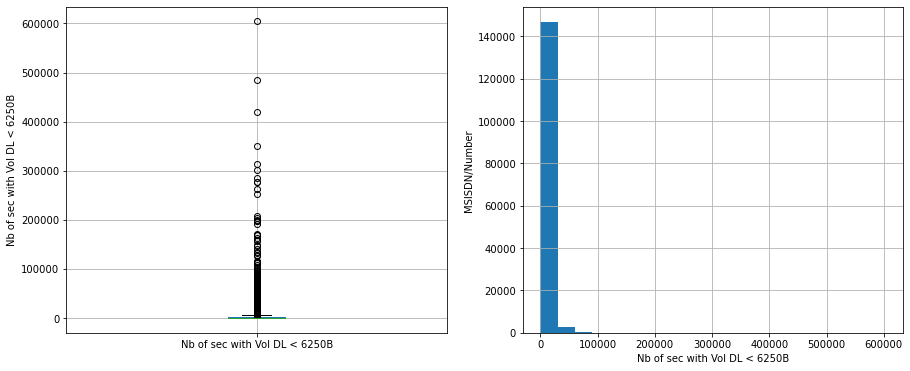

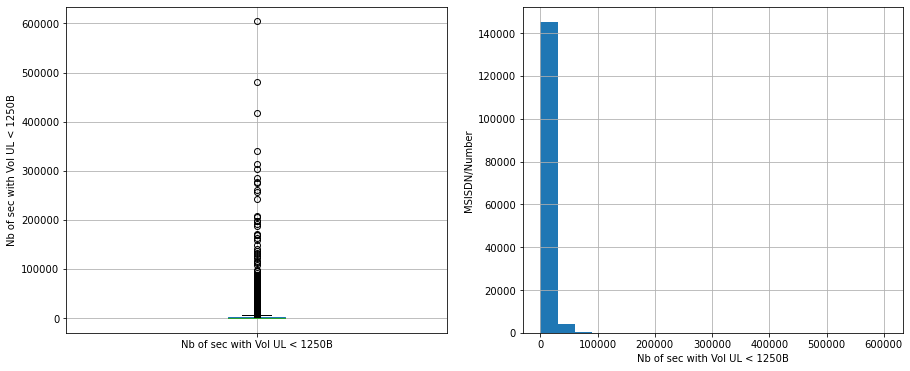

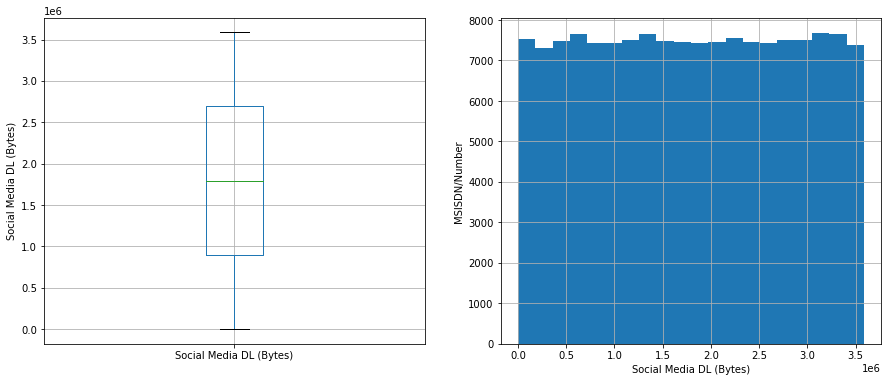

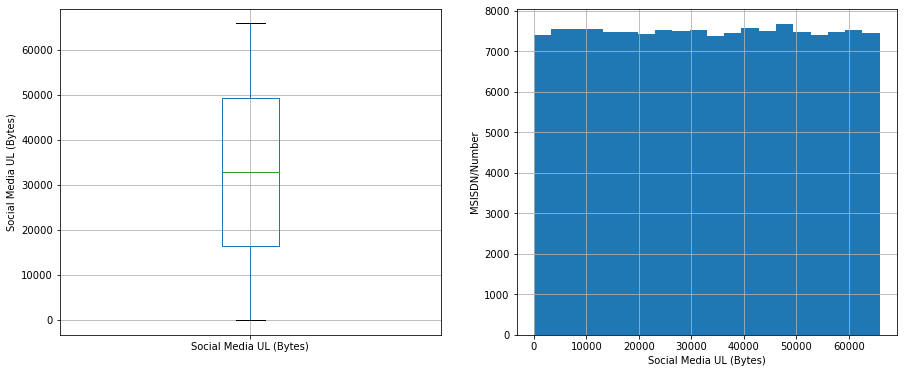

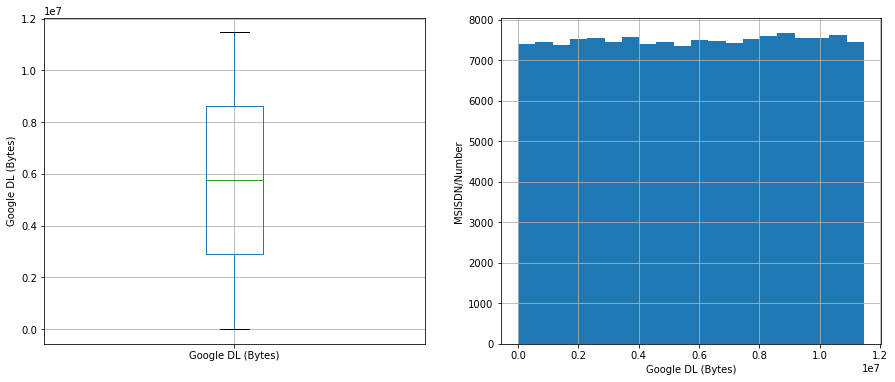

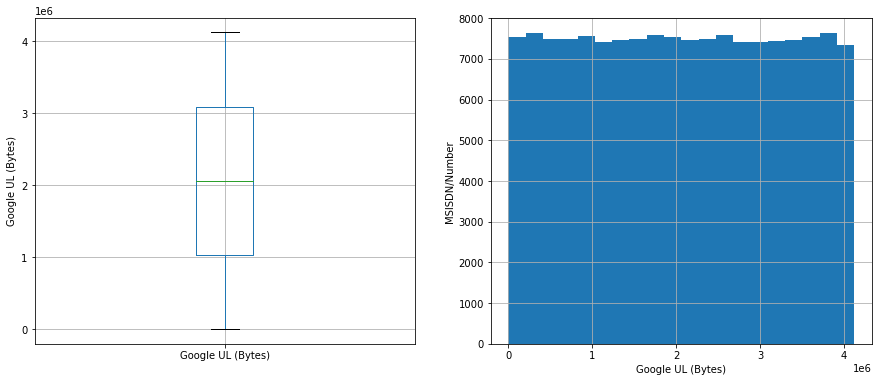

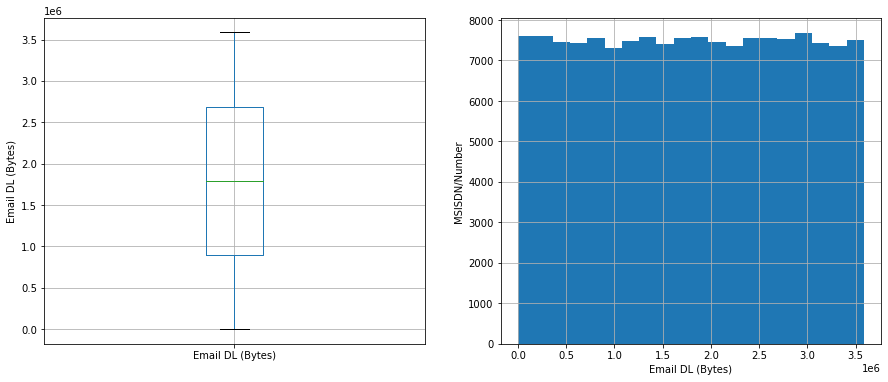

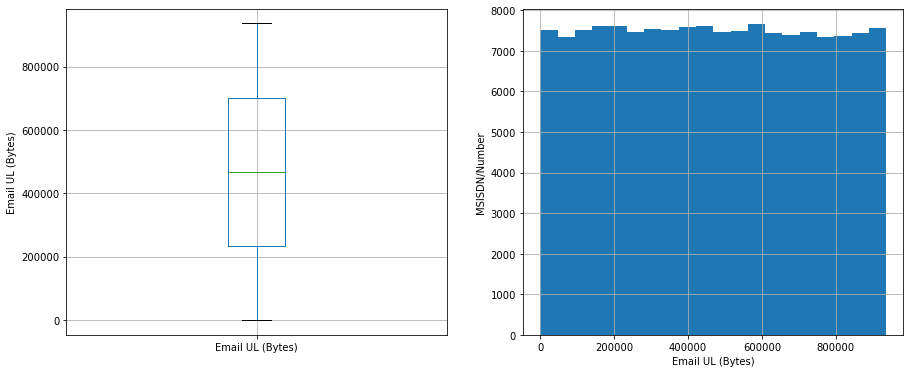

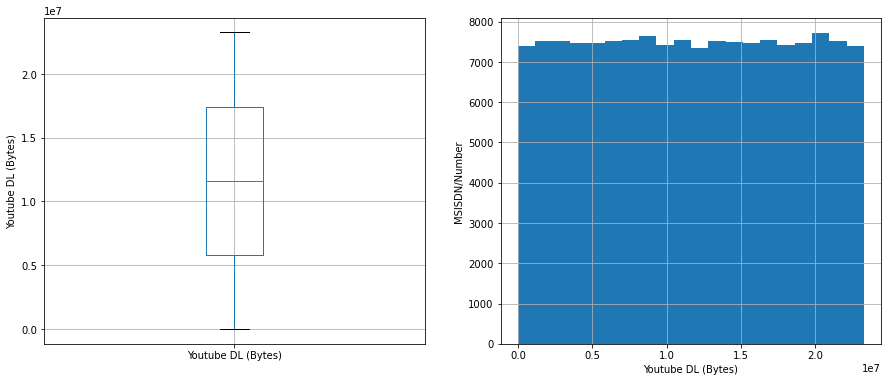

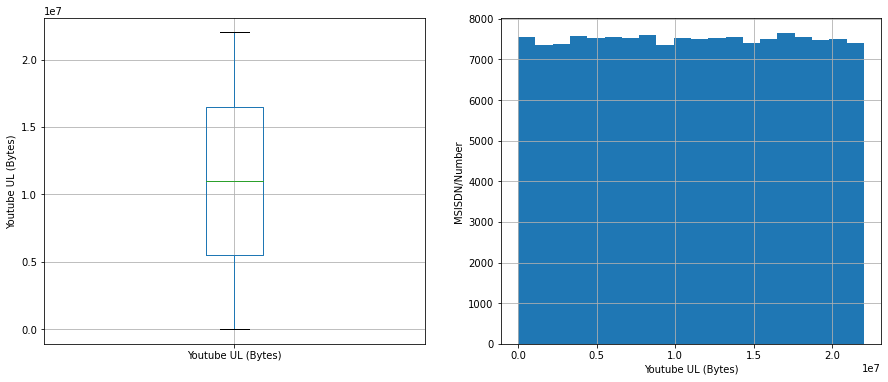

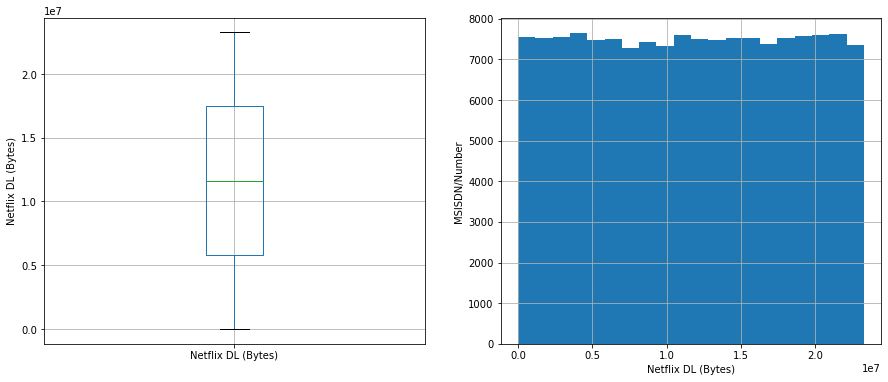

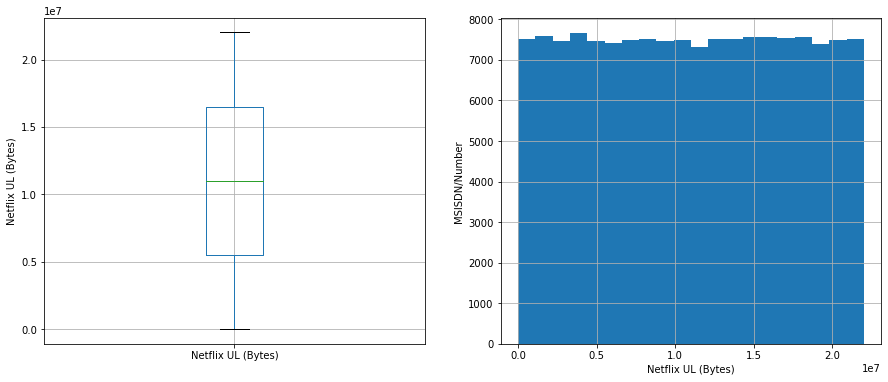

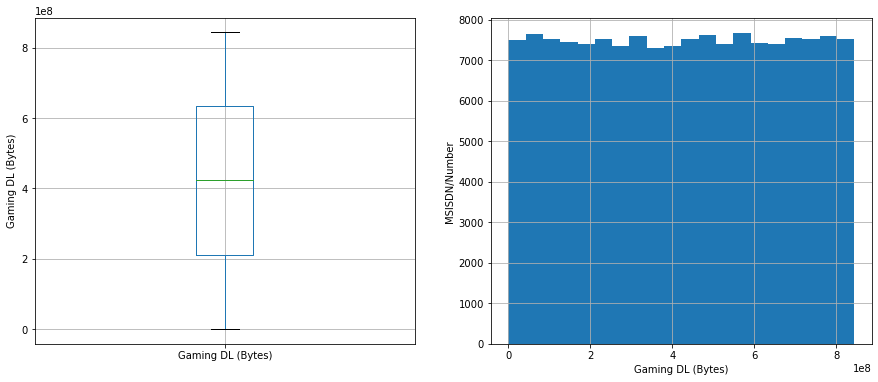

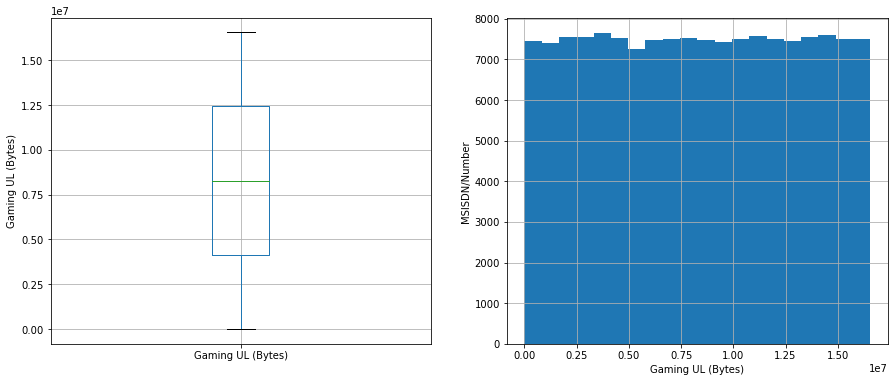

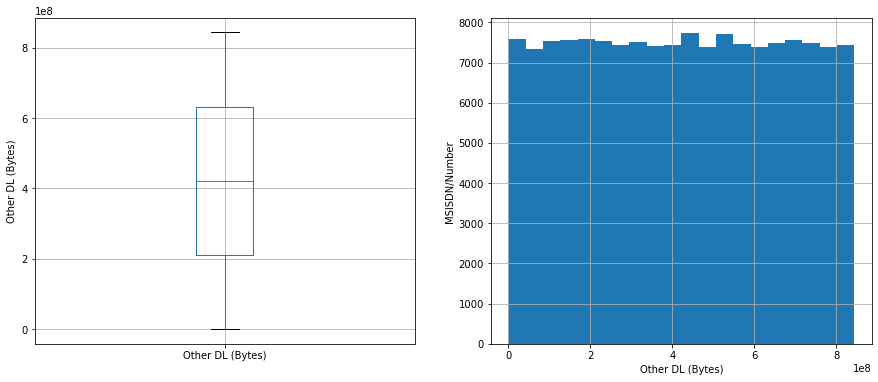

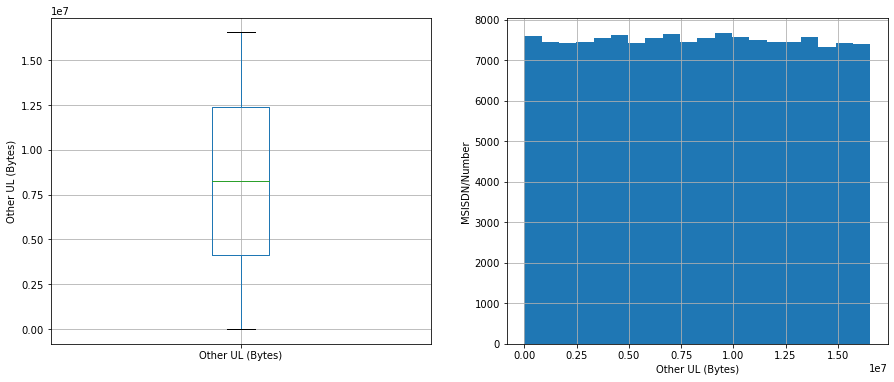

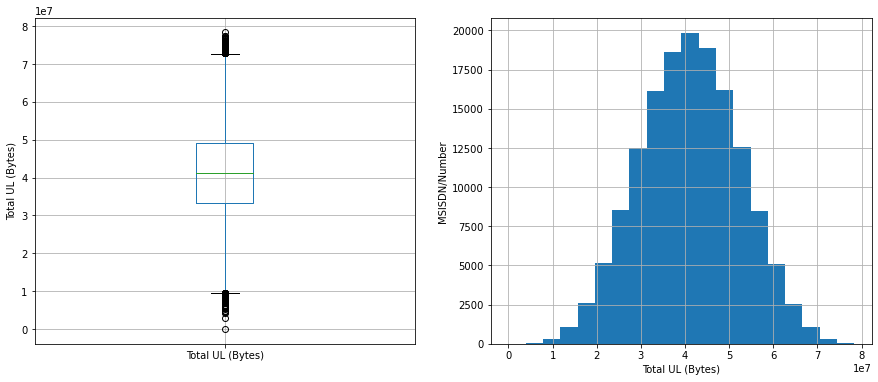

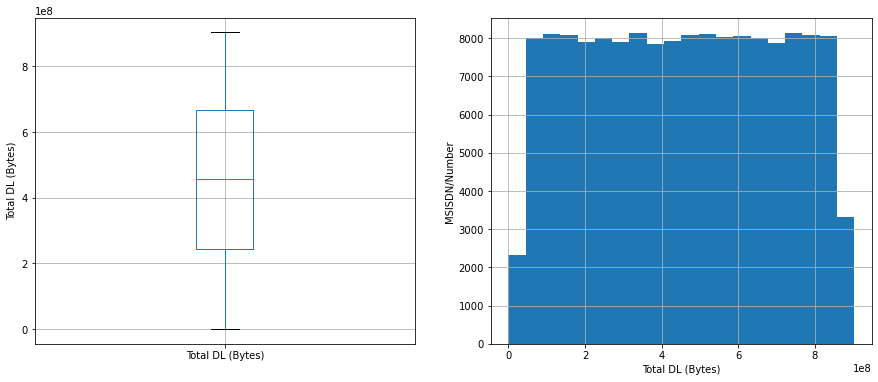

In [23]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data1.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data1[var].hist(bins=20)
    fig.set_ylabel('MSISDN/Number')
    fig.set_xlabel(var)

    plt.show()

In [24]:
#data1.columns.get_loc('MSISDN/Number')

In [25]:
#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution.

In [24]:
data1[categorical].head(3)

,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type
0,13114483460844900352,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F
1,13114483482878900224,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,13114483484080500736,D42335A,Samsung,Samsung Galaxy A8 (2018)


In [27]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#data1['Handset Type'] = labelencoder.fit_transform(data1['Handset Type'])
#data1

In [28]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#data1['Handset Manufacturer'] = labelencoder.fit_transform(data1['Handset Manufacturer'])
#data1

In [25]:
data1

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Bearer Id,Last Location Name,Handset Manufacturer,Handset Type,Start,End
0,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,44.0,109.795706,109.795706,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,37624.0,38787.0,1.823653e+09,213.000000,214.000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,13114483460844900352,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,2019-04-04 12:01:18,2019-04-25 14:35:31
1,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,26.0,109.795706,109.795706,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,168.0,3560.0,1.365104e+09,971.000000,1022.000000,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,13114483482878900224,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),2019-04-09 13:04:04,2019-04-25 08:15:48
2,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,109.795706,6.0,9.0,109.795706,109.795706,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.0,1.361763e+09,751.000000,695.000000,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,13114483484080500736,D42335A,Samsung,Samsung Galaxy A8 (2018),2019-04-09 17:42:11,2019-04-25 11:58:13
3,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,109.795706,44.0,44.0,109.795706,109.795706,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3330.0,37882.0,1.321510e+09,17.000000,207.000000,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,13114483485442799616,T21824A,undefined,undefined,2019-04-10 00:31:25,2019-04-25 07:36:35
4,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,109.795706,6.0,9.0,109.795706,109.795706,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.0,1.089009e+09,607.000000,604.000000,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,13114483499480700928,D88865A,Samsung,Samsung Sm-G390F,2019-04-12 20:10:23,2019-04-25 10:40:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,451.0,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.0,65.0,109.795706,109.795706,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,42376.

## 1. User Overiew Analysis
## Top 10 handsets

In [26]:
top_10_sets = data1['Handset Type'].value_counts(ascending = False).head(10)
top_10_sets = pd.DataFrame(top_10_sets)
top_10_sets

,Handset Type
Huawei B528S-23A,20324
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520
Apple iPhone X (A1901),3813


Text(0.5, 1.0, 'A barplot indicating top ten handset types')

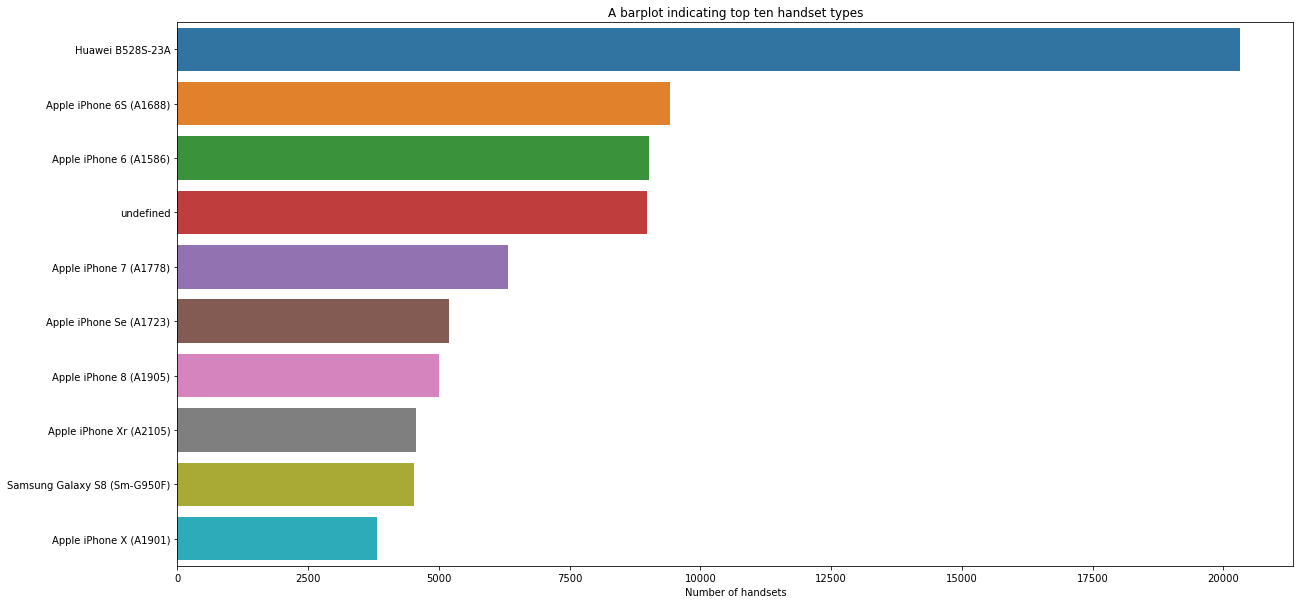

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(y = top_10_sets.index, x = top_10_sets['Handset Type'])
plt.xlabel('Number of handsets')
plt.title('A barplot indicating top ten handset types')

## Top 3 handset manufacturers

In [28]:
top_3_manufacturers = data1['Handset Manufacturer'].value_counts(ascending = False).head(3)
top_3_manufacturers = pd.DataFrame(top_3_manufacturers)
top_3_manufacturers

,Handset Manufacturer
Apple,60137
Samsung,40839
Huawei,34423


## Top 5 handsets per top 3 handset manufacturer

In [29]:
list = ['Apple', 'Samsung', 'Huawei']
new_df = data1[data1['Handset Manufacturer'].isin(list)]
new_df

df_all = new_df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name = 'max').sort_values(['Handset Manufacturer', 'max'], ascending = False)
df_all

,Handset Manufacturer,Handset Type,max
360,Samsung,Samsung Galaxy S8 (Sm-G950F),4520
243,Samsung,Samsung Galaxy A5 Sm-A520F,3724
293,Samsung,Samsung Galaxy J5 (Sm-J530),3696
285,Samsung,Samsung Galaxy J3 (Sm-J330),3484
358,Samsung,Samsung Galaxy S7 (Sm-G930X),3199
...,...,...,...
18,Apple,Apple iPhone 4S (A1431),1
27,Apple,Apple iPhone 5S (A1528),1
43,Apple,Apple iPhone 7 (A1780),1
53,Apple,Apple iPhone 8 Plus (A1899),1


Samsung top 5 handsets 1)Samsung Galaxy S8 (Sm-G950F)

                       2)Samsung Galaxy A5 Sm-A520F
                       
                       3)Samsung Galaxy J5 (Sm-J530)
                       
                       4)Samsung Galaxy J3 (Sm-J330)
                       
                       5)Samsung Galaxy S7 (Sm-G930X)

In [30]:
list = ['Apple']
apple_df = df_all[df_all['Handset Manufacturer']. isin(list)]
apple_df

apple_all = apple_df.groupby([ 'Handset Type']).size().reset_index(name = 'max').sort_values(['Handset Type', 'max'], ascending = False)
apple_all["Handset Type"].max()


'Huawei B528S-23A'

In [31]:
df_crosstab = pd.crosstab(new_df['Handset Type'], new_df['Handset Manufacturer'])
df_crosstab

Handset Manufacturer,Apple,Huawei,Samsung
Handset Type,,,
Apple iPad (A1823),9,0,0
Apple iPad (A1954),9,0,0
Apple iPad 2 (A1396),4,0,0
Apple iPad 3 (A1430),2,0,0
Apple iPad 4 (A1460),8,0,0
...,...,...,...
Samsung Sm-J250Y Ds,0,0,45
Samsung Sm-N7505,0,0,8
Samsung Sm-T235,0,0,1


In [32]:
list = ["Apple","Huawei","Samsung"]
max_x = df_crosstab.loc[df_crosstab[list].idxmax()]
max_x


Handset Manufacturer,Apple,Huawei,Samsung
Handset Type,,,
Apple iPhone 6S (A1688),9419,0,0
Huawei B528S-23A,572,19752,0
Samsung Galaxy S8 (Sm-G950F),0,0,4520


###  Interpretation and recommendation to marketing teams

1- Apple, Huawei and Samsung are the leading manufacturers

2- The top 10 handsets also are manufactured by these companies

3- We therefore recommend that the top 4 handsets should be highly stocked so as to increase on revenue(profit)

### Aggregate per user the following information in the column:
### number of xDR sessions

In [33]:
xDR_sess = data1[['Bearer Id', 'MSISDN/Number']]
a = xDR_sess.groupby('MSISDN/Number').count()
a.columns = ['xDR sessions']
a.head()

,xDR sessions
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2


Text(0.5, 1.0, 'users with highest session numbers')

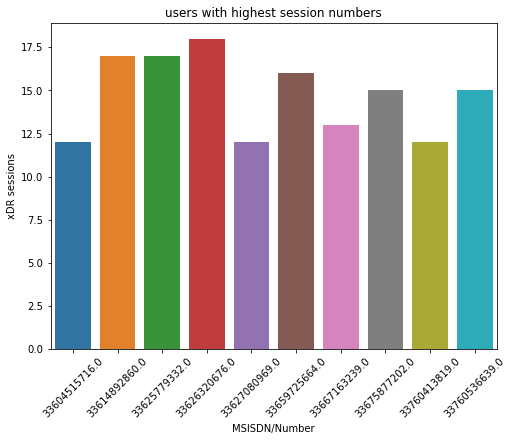

In [34]:
t = a.sort_values(by = 'xDR sessions', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['xDR sessions'])
plt.xticks(rotation = 45)
plt.title('users with highest session numbers')

### Session duration

In [35]:
duration = data1[['Dur. (ms)', 'MSISDN/Number']]
b = duration.groupby('MSISDN/Number').mean()
b.columns = ['session_duration (ms)']
b.head()

,session_duration (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,18552.0


Text(0.5, 1.0, 'users with longest session duration')

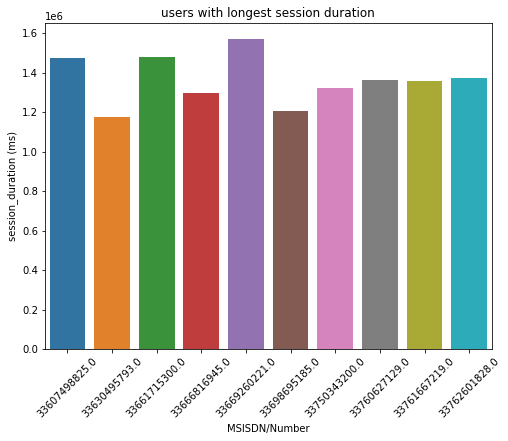

In [36]:
t = b.sort_values(by = 'session_duration (ms)', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['session_duration (ms)'])
plt.xticks(rotation = 45)
plt.title('users with longest session duration')

### The total download (DL) and upload (UL) data

In [37]:
data1['total_bytes'] =  data1['Total UL (Bytes)'] + data1['Total DL (Bytes)']
data1['social_media'] = data1['Social Media DL (Bytes)'] + data1['Social Media UL (Bytes)']
data1['email'] = data1['Email DL (Bytes)'] + data1['Email UL (Bytes)']
data1['google'] = data1['Google DL (Bytes)'] + data1['Google UL (Bytes)']
data1['youtube'] = data1['Youtube DL (Bytes)'] + data1['Youtube UL (Bytes)']
data1['netflix'] = data1['Netflix UL (Bytes)'] + data1['Netflix DL (Bytes)']
data1['gaming'] = data1['Gaming DL (Bytes)'] + data1['Gaming UL (Bytes)']
data1['other'] = data1['Other DL (Bytes)'] + data1['Other UL (Bytes)']
data1['total_tp'] = data1['Avg Bearer TP DL (kbps)'] + data1['Avg Bearer TP UL (kbps)']
data1['total_rtt'] = data1['Avg RTT DL (ms)'] + data1['Avg RTT UL (ms)']

In [38]:
tot_dl_ul = data1[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = tot_dl_ul.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes),total_bytes
MSISDN/Number,,,
3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,94280527.0,1.363130e+09,1.457411e+09


### total data volume (in Bytes) during this session for each application

In [39]:
apps = data1[['MSISDN/Number','social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]
d = apps.groupby('MSISDN/Number').sum()
d.head(10)

,social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,3.865709e+08
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,2.817101e+08
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,5.016937e+08
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,3.527970e+07
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,8.048045e+08
3.360101e+10,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,5.116358e+08,4.923728e+08
3.360101e+10,2769627.0,10196403.0,1358959.0,26431335.0,45812397.0,5.484611e+08,2.248887e+08
3.360101e+10,1782692.0,12023614.0,2215563.0,18892740.0,15292840.0,2.823644e+08,1.782015e+08
3.360101e+10,5288685.0,14134211.0,4599825.0,63443802.0,54216117.0,8.330880e+08,1.041883e+09


Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [40]:
app_tot = data1[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_bytes', 'other']]
# adding a summation row in all columns
app_tot.loc['total'] = app_tot.sum()
app_tot

,social_media,google,email,youtube,netflix,gaming,total_bytes,other
0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,3.456294e+08,1.805588e+08
1,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,7.071854e+08,5.419594e+08
2,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,3.076910e+08,4.149084e+08
3,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,8.893527e+08,7.618372e+08
4,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,6.076814e+08,5.646198e+08
...,...,...,...,...,...,...,...,...
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.057839e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,6.276986e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,4.015220e+08,8.161200e+08
150000,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,2.195914e+02,4.293653e+08


In [41]:
print(app_tot[['total_bytes','social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_bytes', 'other']].corr())

              total_bytes  social_media    google     email   youtube  \
total_bytes      1.000000      0.999998  0.999999  0.999998  0.999999   
social_media     0.999998      1.000000  0.999998  0.999998  0.999998   
google           0.999999      0.999998  1.000000  0.999999  0.999999   
email            0.999998      0.999998  0.999999  1.000000  0.999999   
youtube          0.999999      0.999998  0.999999  0.999999  1.000000   
netflix          0.999999      0.999998  0.999999  0.999999  0.999999   
gaming           1.000000      0.999998  0.999998  0.999998  0.999998   
total_bytes      1.000000      0.999998  0.999999  0.999998  0.999999   
other            0.999998      0.999998  0.999998  0.999998  0.999998   

               netflix    gaming  total_bytes     other  
total_bytes   0.999999  1.000000     1.000000  0.999998  
social_media  0.999998  0.999998     0.999998  0.999998  
google        0.999999  0.999998     0.999999  0.999998  
email         0.999999  0.999998     

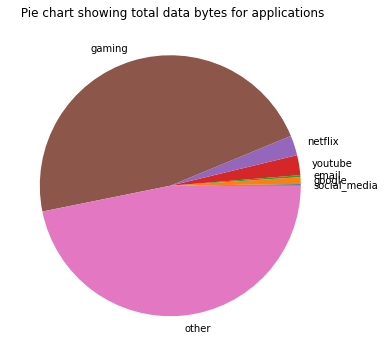

In [42]:
fig = plt.figure(figsize =(12, 6)) 
a = app_tot.drop(['total_bytes'], axis = 1)
plt.pie(a.loc['total'], labels = a.columns)
plt.title(' Pie chart showing total data bytes for applications')
plt.show()

Most of the subscribers use data bytes for gaming indicating that most users are gamers and most apps installed are games

Gaming apps are heavy requiring a lot of data bytes 


Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [43]:
data1['Decile_rank']  = pd.qcut(data1['Dur. (ms).1'], 5)
data1['Decile_rank'] 

0         (148355201.0, 1859336442.0]
1         (148355201.0, 1859336442.0]
2         (148355201.0, 1859336442.0]
3         (148355201.0, 1859336442.0]
4         (148355201.0, 1859336442.0]
                     ...             
149996       (45960110.0, 86399896.0]
149997      (92514751.0, 148355201.0]
149998      (92514751.0, 148355201.0]
149999      (92514751.0, 148355201.0]
150000       (86399896.0, 92514751.0]
Name: Decile_rank, Length: 150001, dtype: category
Categories (5, interval[float64]): [(7142987.999, 45960110.0] < (45960110.0, 86399896.0] < (86399896.0, 92514751.0] < (92514751.0, 148355201.0] < (148355201.0, 1859336442.0]]

In [44]:
new_df = data1[['Decile_rank', 'total_bytes']]
a = new_df.groupby('Decile_rank').count()
a

,total_bytes
Decile_rank,
"(7142987.999, 45960110.0]",30001
"(45960110.0, 86399896.0]",30091
"(86399896.0, 92514751.0]",29909
"(92514751.0, 148355201.0]",30000
"(148355201.0, 1859336442.0]",30000



Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


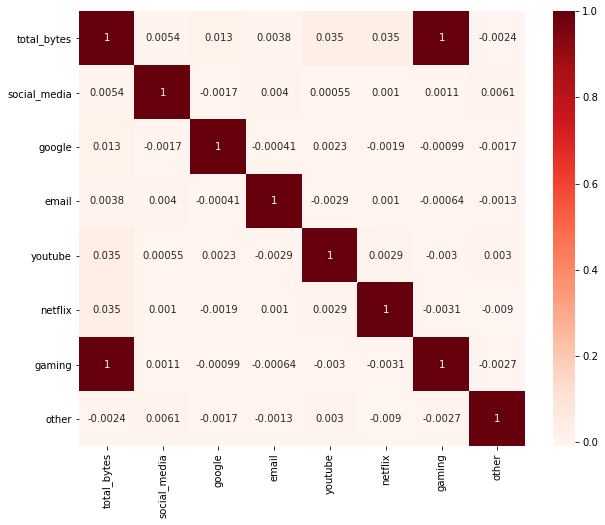

In [45]:
#Using Pearson Correlation
app_corr = data1[['total_bytes','social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]
plt.figure(figsize=(10,8))
cor = app_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

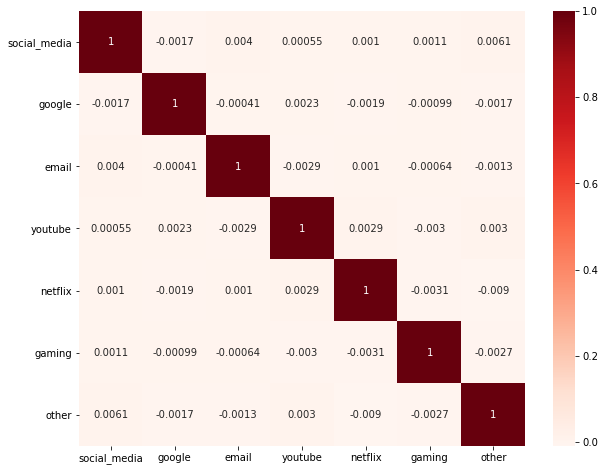

In [46]:
#Using Pearson Correlation
df = data1[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

There is almost 0 correlation between the variables


Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum).

In [47]:
# standardize the data
from sklearn.preprocessing import StandardScaler


new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in data1.columns:
    if data1[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)
        
seg = data1[new_numerical].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) #drop the id col
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)

In [48]:
scaled_data.shape

(150001, 50)

In [49]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [50]:
pca.explained_variance_ratio_

array([1.17307261e-01, 7.99804877e-02, 5.79962322e-02, 5.09591332e-02,
       4.92673282e-02, 4.07080999e-02, 4.04702424e-02, 4.02552707e-02,
       4.00501660e-02, 3.98339940e-02, 3.96626220e-02, 3.94283345e-02,
       2.92182872e-02, 2.87510546e-02, 2.24279253e-02, 2.17633711e-02,
       2.01892279e-02, 2.01183270e-02, 2.00448808e-02, 1.99889442e-02,
       1.99687764e-02, 1.98594710e-02, 1.97816518e-02, 1.97305412e-02,
       1.90672201e-02, 1.75702690e-02, 1.52373896e-02, 1.45073569e-02,
       1.13305871e-02, 8.68682117e-03, 6.89401402e-03, 3.76891842e-03,
       1.57720061e-03, 1.50103611e-03, 1.06974603e-03, 6.06659071e-04,
       4.19702724e-04, 1.44944335e-06, 1.50538473e-13, 2.31347780e-32,
       8.81893444e-33, 8.28331977e-33, 6.08770537e-33, 6.03859876e-33,
       5.95421005e-33, 3.43402227e-33, 3.30041723e-33, 2.04733237e-33,
       2.96361605e-34, 2.77880840e-34])

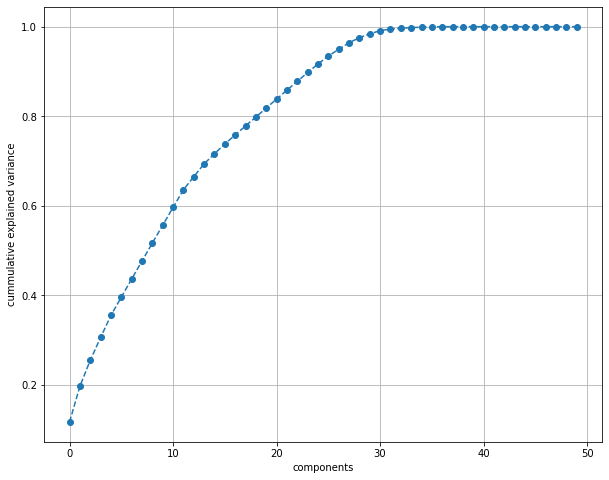

In [51]:
plt.figure(figsize = (10,8))
plt.plot(range(50), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')
plt.grid(True)

When choosing the number of components, the number cutting at least 80% of the cumm explained variance is considered. n = 17

In [52]:
pca = PCA(n_components = 18)
pca.fit(scaled_data)

PCA(n_components=18)

In [53]:
pca_scores = pca.transform(scaled_data)

In [54]:
a = pd.DataFrame(pca_scores)
a['MSISDN/Number'] = data['MSISDN/Number']
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,MSISDN/Number
0,-5.477630,1.218194,0.067757,1.076657,7.915144,-16.709101,6.752023,8.491763,3.573644,10.193371,9.640599,7.720246,4.204387,10.782712,-1.194749,-0.395308,0.090220,0.522489,3.366496e+10
1,-4.320801,-1.677103,0.012645,-2.941380,5.897249,-11.240870,6.659295,6.413907,0.109951,6.336991,8.142319,6.294502,4.625313,7.115771,0.022240,-0.413931,1.554795,0.990122,3.368185e+10
2,-4.365082,1.533064,0.100040,0.100888,5.824864,-11.662944,6.606024,7.004625,3.981979,6.085722,6.772731,5.715640,5.922724,6.521569,0.669721,-0.229194,0.313883,-0.034475,3.376063e+10
3,-4.304230,-3.191327,0.096584,-0.498219,5.665341,-10.661960,8.416058,8.169936,2.354709,4.807083,5.572173,6.095679,3.666496,7.195125,0.593437,-0.182160,-0.580928,0.047125,3.375034e+10
4,-3.730491,-0.882946,0.070988,-0.163974,4.596700,-8.767618,6.148658,6.306094,1.345052,4.995041,4.759735,4.515958,3.405777,5.556028,-1.451104,-0.016883,1.899150,-1.089952,3.369980e+10


### 2. User Engagement analysis
In the current dataset you’re expected to track the user’s engagement using the following engagement metrics:

sessions frequency,

the duration of the session,

the sessions total traffic (download and upload (bytes))

In [55]:
user_data = data1[['MSISDN/Number', 'total_bytes', 'Dur. (ms).1', 'Bearer Id']]
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_bytes': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


### top 10 customers with high session_freq

In [56]:
agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.362632e+10,18,8.791937e+09,7.971167e+09
3.362578e+10,17,1.855376e+10,8.499621e+09
3.361489e+10,17,9.966906e+09,8.846226e+09
3.365973e+10,16,4.035436e+09,7.705863e+09
3.376054e+10,15,9.279442e+09,8.514774e+09
3.367588e+10,15,4.865954e+09,7.891111e+09
3.366716e+10,13,8.744922e+09,5.618394e+09
3.362708e+10,12,4.703519e+09,5.754731e+09
3.360452e+10,12,5.207995e+09,5.487855e+09


### Top 10 users with high sessions traffic

In [57]:
agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.361489e+10,17,9.966906e+09,8.846226e+09
3.376054e+10,15,9.279442e+09,8.514774e+09
3.362578e+10,17,1.855376e+10,8.499621e+09
3.362632e+10,18,8.791937e+09,7.971167e+09
3.367588e+10,15,4.865954e+09,7.891111e+09
3.365973e+10,16,4.035436e+09,7.705863e+09
3.366646e+10,11,4.536764e+09,7.308501e+09
3.376041e+10,12,5.321674e+09,7.132371e+09
3.366471e+10,11,2.927790e+09,6.872018e+09


### Top 10 users with longest sessions duration

In [58]:
agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.362578e+10,17,1.855376e+10,8.499621e+09
3.361489e+10,17,9.966906e+09,8.846226e+09
3.376054e+10,15,9.279442e+09,8.514774e+09
3.362632e+10,18,8.791937e+09,7.971167e+09
3.366716e+10,13,8.744922e+09,5.618394e+09
3.366284e+10,9,6.614274e+09,4.000098e+09
3.366469e+10,9,6.288736e+09,5.682007e+09
3.360313e+10,12,6.287767e+09,4.976195e+09
3.366746e+10,6,5.649885e+09,2.600522e+09


Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [59]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927


In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [61]:
km.fit(norm_agg_user_data)
km_data = km.predict(norm_agg_user_data)

In [62]:
km.labels_

array([1, 1, 1, ..., 0, 0, 1])

In [63]:
km_data

array([1, 1, 1, ..., 0, 0, 1])

In [64]:
km.cluster_centers_

array([[ 1.11497062, 19.27912211, 20.8114482 ],
       [ 0.71908536, 18.50977982, 19.78463969],
       [ 0.73780652, 17.16858769, 19.98526434]])

In [65]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(km_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,0.693147,18.575290,20.593943,1
3.360100e+10,0.693147,19.015283,18.870862,1
3.360100e+10,0.693147,18.720558,20.205695,1
3.360101e+10,0.693147,17.725091,19.861276,2
3.360101e+10,1.098612,17.429248,21.099927,2


<AxesSubplot:>

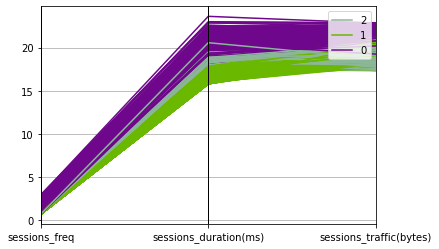

In [70]:
#plot the clusters(3D)
pd.plotting.parallel_coordinates(norm_agg_user_data, 'clusters')

Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

Aggregate user total traffic per application and derive the top 10 most engaged users per application

Plot the top 3 most used applications using appropriate charts.  

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 

    What is the optimized value of k (use elbow method for this)?  

    Interpret your findings. 


In [66]:
agg_user_data['clusters'] = km_data
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,1
3.360100e+10,1,181230963.0,1.568596e+08,1
3.360100e+10,1,134969374.0,5.959665e+08,1
3.360101e+10,1,49878024.0,4.223207e+08,2
3.360101e+10,2,37104453.0,1.457411e+09,2


In [67]:
agg_user_data.clusters.value_counts()

1    54333
0    30021
2    22502
Name: clusters, dtype: int64

In [68]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]           
print(cluster_1.shape)
cluster_1.tail()

(30021, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378989e+10,1,173035258.0,8.529393e+08,0
3.378995e+10,2,209051329.0,1.540055e+09,0
3.378998e+10,2,210390146.0,1.094693e+09,0
3.197021e+12,1,877385325.0,2.321240e+08,0
3.370000e+14,1,253030201.0,5.962878e+08,0


In [69]:
cluster_1.describe() 

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,30021.000000,3.002100e+04,3.002100e+04,30021.0
mean,2.203158,2.839641e+08,1.197849e+09,0.0
std,1.102779,2.973669e+08,5.744764e+08,0.0
min,1.000000,5.447539e+07,1.770069e+08,0.0
25%,2.000000,1.719472e+08,8.164577e+08,0.0
50%,2.000000,2.232694e+08,1.048735e+09,0.0
75%,3.000000,3.286352e+08,1.435745e+09,0.0
max,18.000000,1.855376e+10,8.846226e+09,0.0


In [70]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]       
print(cluster_2.shape)
cluster_2.tail()

(54333, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378996e+10,1,98826284.0,645777687.0,1
3.378996e+10,1,157069852.0,710287575.0,1
3.378997e+10,1,160461578.0,208123067.0,1
3.379000e+10,1,140988659.0,480307335.0,1
8.823971e+14,1,869844200.0,139153646.0,1


In [85]:
cluster_2.describe() 

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,29403.000000,2.940300e+04,2.940300e+04,29403.0
mean,2.223209,2.866961e+08,1.206979e+09,1.0
std,1.103699,2.997814e+08,5.764387e+08,0.0
min,1.000000,5.447539e+07,1.770069e+08,1.0
25%,2.000000,1.727958e+08,8.222057e+08,1.0
50%,2.000000,2.261464e+08,1.061667e+09,1.0
75%,3.000000,3.322120e+08,1.446085e+09,1.0
max,18.000000,1.855376e+10,8.846226e+09,1.0


In [86]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]       
print(cluster_3.shape)
cluster_3.tail()

(54887, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378996e+10,1,98826284.0,645777687.0,2
3.378996e+10,1,157069852.0,710287575.0,2
3.378997e+10,1,160461578.0,208123067.0,2
3.379000e+10,1,140988659.0,480307335.0,2
8.823971e+14,1,869844200.0,139153646.0,2


In [87]:
cluster_3.describe() 

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,54887.000000,5.488700e+04,5.488700e+04,54887.0
mean,1.065863,1.179497e+08,4.658153e+08,2.0
std,0.249363,5.133022e+07,2.359423e+08,0.0
min,1.000000,4.285693e+07,3.324901e+07,2.0
25%,1.000000,8.639992e+07,2.667468e+08,2.0
50%,1.000000,9.837569e+07,4.549614e+08,2.0
75%,1.000000,1.415175e+08,6.529276e+08,2.0
max,3.000000,1.035262e+09,1.214536e+09,2.0


In [73]:
app_traffic = data1[['social_media', 'netflix', 'youtube', 'google', 'email', 'gaming', 'other', 'MSISDN/Number']]
app_traffic.tail()

,social_media,netflix,youtube,google,email,gaming,other,MSISDN/Number
149996,3.517065e+06,3.756186e+07,2.795510e+07,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07,3.365069e+10
149997,2.352181e+06,4.064329e+07,2.216552e+07,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08,3.366345e+10
149998,1.260239e+06,1.502970e+07,2.451641e+07,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08,3.362189e+10
149999,8.231090e+05,1.649484e+07,1.712251e+07,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08,3.361962e+10
150000,1.828250e+06,2.262861e+07,2.264348e+07,7.807295e+06,2.259102e+06,4.303331e+08,4.293653e+08,NaN


In [74]:
agg_app_traffic = app_traffic.groupby('MSISDN/Number').agg({'social_media':'sum', 'netflix':'sum', 'youtube':'sum', 'gaming':'sum', 
                                                            'google':'sum', 'email':'sum', 'other':'sum'})
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [75]:
agg_app_traffic.sort_values(by = 'social_media', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [76]:
agg_app_traffic.sort_values(by = 'netflix', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [77]:
agg_app_traffic.sort_values(by = 'youtube', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [78]:
agg_app_traffic.sort_values(by = 'gaming', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [79]:
agg_app_traffic.sort_values(by = 'google', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [80]:
agg_app_traffic.sort_values(by = 'email', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


In [81]:
agg_app_traffic.sort_values(by = 'other', ascending = False)
agg_app_traffic.head(10)

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,3.865709e+08
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,2.817101e+08
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,5.016937e+08
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,3.527970e+07
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,8.048045e+08
3.360101e+10,3792912.0,30315501.0,34347122.0,5.116358e+08,15263134.0,7848596.0,4.923728e+08
3.360101e+10,2769627.0,45812397.0,26431335.0,5.484611e+08,10196403.0,1358959.0,2.248887e+08
3.360101e+10,1782692.0,15292840.0,18892740.0,2.823644e+08,12023614.0,2215563.0,1.782015e+08
3.360101e+10,5288685.0,54216117.0,63443802.0,8.330880e+08,14134211.0,4599825.0,1.041883e+09


#### Plot the top 3 most used applications.
Most used applications can be determined by the Application with highest traffic data or the application with the most users.

In [82]:
agg_app_traffic.loc['total_app_traffic'] = agg_app_traffic.sum()  
agg_app_traffic.tail()

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
33789997247.0,4.985690e+05,8.531060e+06,1.985157e+07,4.370033e+08,5.429705e+06,2.514097e+06,2.111151e+08
3197020876596.0,7.152240e+05,2.659230e+07,1.195990e+07,1.780487e+08,1.043866e+07,1.520771e+06,4.705265e+08
337000037000919.0,5.215660e+05,3.090504e+07,3.673494e+07,5.101427e+08,9.830617e+06,3.318582e+06,1.491884e+08
882397108489451.0,1.546088e+06,2.884623e+07,4.094071e+07,4.307026e+07,9.218647e+06,3.330974e+06,4.013605e+08
total_app_traffic,2.722655e+11,3.370060e+12,3.372204e+12,6.408892e+13,1.162853e+12,3.364677e+11,6.395425e+13


Text(0.5, 0, 'application')

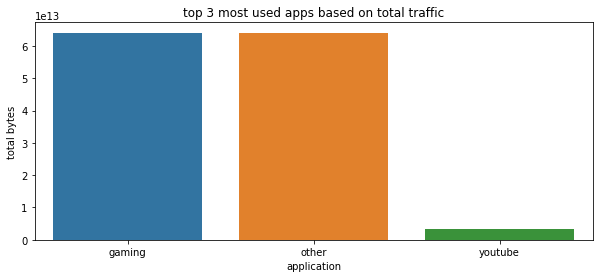

In [83]:
a = agg_app_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(10,4))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')

In [84]:
norm_agg_user_data = norm_agg_user_data.drop(['clusters'], axis = 1)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927


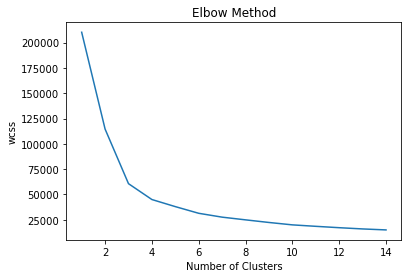

In [88]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=14, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_user_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

### k = 4 clusters

In [89]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=14, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,2
3.360100e+10,1,181230963.0,1.568596e+08,3
3.360100e+10,1,134969374.0,5.959665e+08,2
3.360101e+10,1,49878024.0,4.223207e+08,1
3.360101e+10,2,37104453.0,1.457411e+09,1


Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode 

of the corresponding variable):

Average TCP retransmission

Average RTT

Handset type

Average throughput

Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

TCP values in the dataset. 

RTT values in the dataset.

Throughput values in the dataset.

Task 3.3 - Compute & report:

The distribution of the average throughput  per handset type and provide interpretation for your findings.

The average TCP retransmission view per handset type and provide interpretation for your findings.

Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of 

experiences and provide a brief description of each cluster. (The description must define each group based on your 

understanding of the data)

In [90]:
exp_data = data1[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]
exp_data.isna().any()

MSISDN/Number                   True
Handset Type                   False
Avg RTT DL (ms)                False
Avg RTT UL (ms)                False
Avg Bearer TP DL (kbps)        False
Avg Bearer TP UL (kbps)        False
TCP DL Retrans. Vol (Bytes)    False
TCP UL Retrans. Vol (Bytes)    False
dtype: bool

In [91]:
exp_data_od = data1[[ 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

In [94]:
from scipy import stats
zscore = np.abs(stats.zscore(exp_data_od))
print(zscore)

[[0.12120645 0.35205157 0.55385865 0.373253   0.07291872 0.01711974]
 [0.08008661 0.35205157 0.55415066 0.37714462 0.07291872 0.01711974]
 [0.         0.88825667 0.55456782 0.38082003 0.07291872 0.01711974]
 ...
 [0.11941863 0.34021609 0.55302434 0.3726044  0.07291872 0.01711974]
 [0.13014554 0.35205157 0.55339978 0.37476641 0.07291872 0.01711974]
 [0.         0.88825667 0.55385865 0.3741178  0.07291872 0.01711974]]


In [95]:
threshold = 3
print(np.where(zscore > 3))

(array([    58,     72,     86, ..., 149955, 149971, 149990], dtype=int64), array([1, 1, 2, ..., 1, 2, 3], dtype=int64))


In [96]:
exp_data_clean = exp_data 
exp_data_clean = exp_data_clean[(zscore < 3).all(axis=1)]

In [97]:
exp_data.shape

(150001, 8)

In [98]:
exp_data_clean.shape

(141619, 8)

In [99]:
exp_data_clean['total_tp(kbps)'] = exp_data_clean['Avg Bearer TP DL (kbps)'] + exp_data_clean['Avg Bearer TP UL (kbps)']
exp_data_clean['total_rtt(ms)'] = exp_data_clean['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
exp_data_clean['total_tcp(bytes)'] = exp_data_clean['TCP DL Retrans. Vol (Bytes)'] + exp_data_clean['TCP UL Retrans. Vol (Bytes)']
exp_data_clean.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0,109.795706,109.795706,67.0,47.0,219.591412
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0,109.795706,109.795706,42.0,70.0,219.591412
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,109.795706,6.0,9.0,109.795706,109.795706,15.0,NaN,219.591412
3,3.375034e+10,undefined,109.795706,109.795706,44.0,44.0,109.795706,109.795706,88.0,NaN,219.591412
4,3.369980e+10,Samsung Sm-G390F,109.795706,109.795706,6.0,9.0,109.795706,109.795706,15.0,NaN,219.591412


In [101]:
# aggregating

# handset type
a = exp_data_clean[['MSISDN/Number', 'Handset Type']]
b = a.groupby('MSISDN/Number').count()
print(b.shape)
b = b.reset_index()
b.head()

(103132, 1)


,MSISDN/Number,Handset Type
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,1


In [102]:
c = exp_data.drop(['Handset Type'], axis = 1)
d = c.groupby('MSISDN/Number').sum()
d = d.reset_index()
print(d.shape)
d.head()

(106856, 7)


,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,3.360100e+10,46.000000,0.000000,37.0,39.0,1.097957e+02,109.795706
1,3.360100e+10,30.000000,1.000000,48.0,51.0,1.097957e+02,109.795706
2,3.360100e+10,109.795706,109.795706,48.0,49.0,1.097957e+02,109.795706
3,3.360101e+10,69.000000,15.000000,204.0,44.0,1.066000e+03,109.795706
4,3.360101e+10,114.000000,5.000000,40395.0,16449.0,9.349740e+06,21311.795706


In [103]:
exp_data_data = pd.merge(left=b, right=d, how='left', left_on='MSISDN/Number', right_on='MSISDN/Number')
print(exp_data_data.shape)
exp_data_data.head()

(103132, 8)


,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,3.360100e+10,1,46.000000,0.000000,37.0,39.0,1.097957e+02,109.795706
1,3.360100e+10,1,30.000000,1.000000,48.0,51.0,1.097957e+02,109.795706
2,3.360100e+10,1,109.795706,109.795706,48.0,49.0,1.097957e+02,109.795706
3,3.360101e+10,1,69.000000,15.000000,204.0,44.0,1.066000e+03,109.795706
4,3.360101e+10,1,114.000000,5.000000,40395.0,16449.0,9.349740e+06,21311.795706
